# Seasonal variation of CO2 over the Southern Ocean from aircraft observations

In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
import os
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import datasets
import emergent_constraint as ec
import figure_panels
import obs_aircraft
import obs_surface
import util

## Compute trends at SPO 

Identify the models we're using the analysis.

In [28]:
constraint_type = 'ocean_constraint'
campaign_info = obs_aircraft.get_campaign_info(verbose=False, lump_orcas=True)
model_input_lists

{'model_tracer_list': [('CT2017', 'CO2_OCN'),
  ('CT2019B', 'CO2_OCN'),
  ('CTE2018', 'CO2_OCN'),
  ('CTE2020', 'CO2_OCN'),
  ('MIROC', 'CO2_OCN'),
  ('CAMSv20r1', 'CO2_OCN'),
  ('s99oc_v2020', 'CO2_OCN'),
  ('s99oc_ADJocI40S_v2020', 'CO2_OCN'),
  ('s99oc_SOCCOM_v2020', 'CO2_OCN'),
  ('TM5-Flux-m0f', 'CO2_OCN'),
  ('TM5-Flux-mmf', 'CO2_OCN'),
  ('TM5-Flux-mrf', 'CO2_OCN'),
  ('TM5-Flux-mwf', 'CO2_OCN')],
 'model_tracer_ext_list': [('CT2017', 'CO2_LND+CO2_FFF'),
  ('CT2019B', 'CO2_LND+CO2_FFF'),
  ('CTE2018', 'CO2_LND+CO2_FFF'),
  ('CTE2020', 'CO2_LND+CO2_FFF'),
  ('CAMSv20r1', 'CO2_LND+CO2_FFF'),
  ('s99oc_v2020', 'CO2_LND+CO2_FFF'),
  ('s99oc_ADJocI40S_v2020', 'CO2_LND+CO2_FFF'),
  ('s99oc_SOCCOM_v2020', 'CO2_LND+CO2_FFF')],
 'model_list_sfco2_lnd': []}

Load the observations and "simulated" observations.

In [32]:
da_srf = obs_surface.open_surface_co2_data('obs', 'CO2')
da_srf = da_srf.sel(record='SPO_NOAA_insitu_CO2')
da_srf

<xarray.DataArray 'CO2' (time: 255)>
array([365.08      , 365.02      , 364.95      , 364.85      ,
       365.02      , 365.23      , 365.55      , 365.88      ,
       366.27      , 366.53      , 366.66      , 366.77      ,
       366.68      , 366.53      , 366.37      , 366.29      ,
       366.36      , 366.48      , 366.78      , 367.22      ,
       367.71      , 367.91      , 367.91      , 367.83      ,
       368.08      , 367.90433333, 367.73433333, 367.57      ,
       367.84      , 368.1       , 368.36      , 368.79      ,
       369.29      , 369.62      , 369.87      , 369.91      ,
       369.71      , 369.57      , 369.48      , 369.52      ,
       369.78      , 370.04      , 370.44      , 370.94      ,
       371.46      , 371.89      , 372.06      , 372.02      ,
       371.9       , 371.98      , 371.89      , 371.99      ,
       372.14      , 372.47      , 372.8       , 373.24      ,
       373.81      , 374.11      , 374.13      , 374.01      ,
       374.01      , 374.05      , 373.86      , 374.06      ,
       374.19      , 374.39      , 374.76      , 375.07      ,
       375.58      , 375.74      , 375.72      , 375.68      ,
       375.65      , 375.61      , 375.25      , 375.43      ,
       375.62      , 376.06      , 376.58      , 377.09      ,
...
       393.75      , 394.        , 394.02      , 393.98      ,
       393.93      , 393.89      , 393.64      , 393.69      ,
       393.83      , 394.22      , 394.54      , 395.01      ,
       395.52      , 395.87      , 395.95      , 395.9       ,
       395.79      , 395.79      , 395.79      , 395.84      ,
       396.16      , 396.64      , 397.03      , 397.45      ,
       398.01      , 398.4       , 398.36      , 398.54      ,
       398.54      , 398.67      , 398.54      , 399.        ,
       399.33      , 399.95      , 400.52      , 401.09      ,
       401.49      , 401.66      , 401.73      , 401.5       ,
       401.38      , 401.25      , 401.13      , 401.08      ,
       401.21      , 401.66      , 402.05      , 402.62      ,
       403.21      , 403.55      , 403.7       , 403.67      ,
       403.66      , 403.81      , 403.76      , 403.79      ,
       404.13      , 404.46      , 404.72      , 405.19      ,
       405.69      , 406.05      , 406.17      , 406.16      ,
       406.15      , 405.83      , 405.81      , 405.89      ,
       406.13      , 406.64      , 407.15      , 407.84      ,
       408.39      , 408.72      , 408.86      , 408.91      ,
       408.84      , 408.6337    , 408.3322    ])
Coordinates:
  * time         (time) datetime64[ns] 1998-12-15 1999-01-15 ... 2020-02-14
    year_frac    (time) float64 1.999e+03 1.999e+03 ... 2.02e+03 2.02e+03
    record       <U19 'SPO_NOAA_insitu_CO2'
    institution  object 'NOAA'
    lat          float64 -89.98
    lon          float64 -24.8
    stncode      object 'SPO'
Attributes:
    long_name:  CO$_2$
    units:      ppm

In [33]:
spo_fit = util.apply_stl_decomp(da_srf)
spo_fit

STL fit: r^2 = 0.9995
STL fit: r^2 = 0.6673
Overall r^2 = 0.9998


<xarray.Dataset>
Dimensions:    (time: 255)
Coordinates:
  * time       (time) datetime64[ns] 1998-12-15 1999-01-15 ... 2020-02-14
Data variables:
    observed   (time) float64 365.1 365.0 364.9 364.9 ... 408.8 408.6 408.3
    trend      (time) float64 365.0 365.1 365.2 365.4 ... 408.6 408.9 409.1
    seasonal   (time) float64 0.2398 -0.02967 -0.277 ... 0.1726 -0.2289 -0.6563
    resid      (time) float64 -0.1519 -0.06259 -0.005082 ... 0.0001463 -0.09651
    predicted  (time) float64 365.2 365.1 365.0 364.8 ... 408.8 408.6 408.4

Visualize the fit

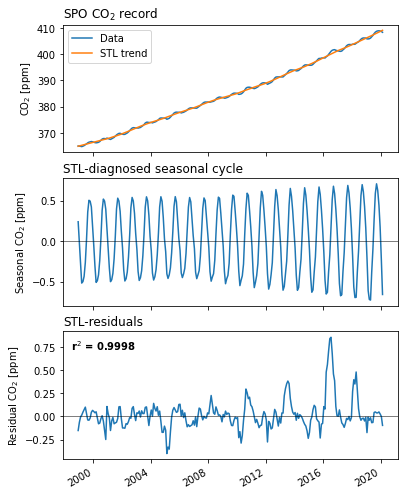

In [36]:
fig, axs = plt.subplots(3, 1, figsize=(6, 8), squeeze=False,)

spo_fit.observed.plot(label='Data', ax=axs[0, 0])
spo_fit.trend.plot(label='STL trend', ax=axs[0, 0])
axs[0, 0].set_ylabel('CO$_2$ [ppm]')
axs[0, 0].set_xlabel('')
axs[0, 0].set_xticklabels([])
axs[0, 0].legend()
axs[0, 0].set_title('SPO CO$_2$ record', loc='left')

spo_fit.seasonal.plot(ax=axs[1, 0])
axs[1, 0].axhline(0, linewidth=0.5, color='k')
plt.title('Seasonal component of STL fit')
axs[1, 0].set_ylabel('Seasonal CO$_2$ [ppm]')
axs[1, 0].set_xlabel('')
axs[1, 0].set_xticklabels([])
axs[1, 0].set_title('STL-diagnosed seasonal cycle', loc='left')

spo_fit.resid.plot(ax=axs[2, 0])
axs[2, 0].axhline(0, linewidth=0.5, color='k')
axs[2, 0].set_ylabel('Residual CO$_2$ [ppm]')
axs[2, 0].set_xlabel('')
axs[2, 0].set_title('STL-residuals', loc='left')
ylm = np.array(axs[2, 0].get_ylim())
axs[2, 0].text(
    axs[2, 0].get_xlim()[0]+200, ylm[1]-np.diff(ylm)*0.15, 
    f'r$^2$ = {util.r2(spo_fit):0.4f}',
    fontweight='bold',
    ha='left',
);

In [37]:
dsets_prof = datasets.aircraft_profiles('obs')[['co2_med']]
dsets_prof

<xarray.Dataset>
Dimensions:    (profile: 357, theta: 27)
Coordinates:
    campaign   (profile) <U32 'HIPPO-1' 'HIPPO-1' ... 'ORCAS-F' 'ORCAS-F'
    doy        (profile) float64 20.0 20.0 20.0 20.0 20.0 ... 56.0 56.0 0.0 0.0
    flight_id  (profile) <U32 'HIPPO-001-007' ... 'ORCAS-001-019'
    lat        (profile) float64 -44.73 -46.5 -49.75 ... -54.85 -51.65 -45.44
    lon        (profile) float64 170.4 169.6 170.1 ... -68.29 -72.46 -76.02
    month      (profile) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 2.0 2.0 2.0 2.0 2.0
  * profile    (profile) <U17 'HIPPO-001-007-074' ... 'ORCAS-001-019-207'
  * theta      (theta) float64 270.0 275.0 280.0 285.0 ... 390.0 395.0 400.0
    time       (profile) datetime64[ns] 2009-01-20 2009-01-20 ... 2016-02-29
    year       (profile) float64 2.009e+03 2.009e+03 ... 2.016e+03 2.016e+03
Data variables:
    co2_med    (profile, theta) float64 nan nan nan nan nan ... nan nan nan nan

In [38]:
spo_trend = xr.DataArray(
    np.interp(dsets_prof.time, spo_fit.time, spo_fit.trend),
    dims=('profile'), 
)
dco2 = dsets_prof.co2_med - spo_trend
dco2

<xarray.DataArray (profile: 357, theta: 27)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * profile    (profile) object 'HIPPO-001-007-074' ... 'ORCAS-001-019-207'
    campaign   (profile) <U32 'HIPPO-1' 'HIPPO-1' ... 'ORCAS-F' 'ORCAS-F'
    doy        (profile) float64 20.0 20.0 20.0 20.0 20.0 ... 56.0 56.0 0.0 0.0
    flight_id  (profile) <U32 'HIPPO-001-007' ... 'ORCAS-001-019'
    lat        (profile) float64 -44.73 -46.5 -49.75 ... -54.85 -51.65 -45.44
    lon        (profile) float64 170.4 169.6 170.1 ... -68.29 -72.46 -76.02
    month      (profile) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 2.0 2.0 2.0 2.0 2.0
  * theta      (theta) float64 270.0 275.0 280.0 285.0 ... 390.0 395.0 400.0
    time       (profile) datetime64[ns] 2009-01-20 2009-01-20 ... 2016-02-29
    year       (profile) float64 2.009e+03 2.009e+03 ... 2.016e+03 2.016e+03

/glade/work/mclong/miniconda3/envs/so-co2/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


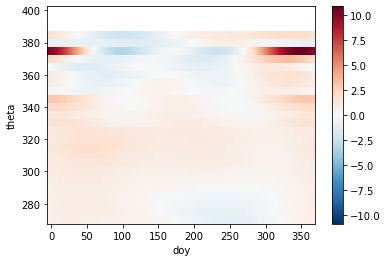

In [39]:
xhat = np.arange(-5, 365+5, 1)    
yhat = xr.DataArray(np.ones((len(dco2.theta), len(xhat)))*np.nan, 
                    dims=('theta', 'doy'),
                    coords=dict(
                        theta=dco2.theta,
                        doy=xhat,
                    ),
                   )

doy = dco2.doy.values
for k in range(len(dco2.theta)):
    x, y = util.antyear_daily(doy, dco2.isel(theta=k).values)
    missing = np.isnan(x) | np.isnan(y)
    if np.sum(~missing) < 5:
        continue
    p, pcov = ec.curve_fit(
        ec.harmonic, 
        xdata=x[~missing]/365.25, 
        ydata=y[~missing], 
    )

    yhat.data[k, :] = ec.harmonic(xhat/365.25, *p)

    
seasonal_amplitude = (yhat.max('doy') - yhat.min('doy'))
yhat.plot()

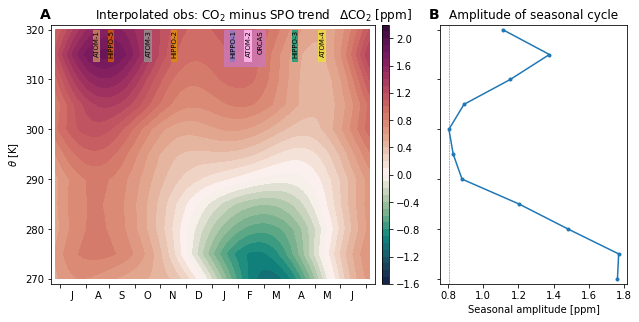

In [40]:
fig = plt.figure(figsize=(8, 4)) #dpi=300)

c_spec = figure_panels.marker_spec_campaigns(lump_orcas=True)
txt_box_props = dict(boxstyle='square,pad=0', facecolor='none', edgecolor='none')

# set up plot grid
gs = gridspec.GridSpec(
    nrows=1, ncols=4, 
    width_ratios=[0.65, 0.015, 0.075, 0.375],
    left=0., right=1.,
    bottom=0.05, top=0.95,
    hspace=0.25, wspace=0.05,
)
axs = np.empty((1, 2)).astype(object)
axs[0, 0] = plt.subplot(gs[0, 0])
cax = plt.subplot(gs[0, 1])
axs[0, 1] = plt.subplot(gs[0, 3])

ax = axs[0, 0] 
pc = ax.contourf(
              yhat.doy,
              yhat.theta.sel(theta=slice(None, 320)), 
              yhat.sel(theta=slice(None, 320)),
              levels=figure_panels.levels,
              norm=figure_panels.divnorm,
              cmap=figure_panels.cmap,
             )

for c, info in campaign_info.items():
    tb = util.day_of_year(info['time_bound'])
    x, _ = util.antyear_daily(tb, np.ones(2))
    ax.axvspan(
        x[0], x[1], 
        ymin=0.84 if c == 'ORCAS' else 0.86, 
        ymax=0.98,
        color=c_spec[c]['color'], 
        alpha=1 if c in ['HIPPO-1', 'ATOM-2'] else 0.75, 
    )
    xtxt = x.mean() + np.diff(x)*0.18
    if c == 'ORCAS':
        xtxt += 10
    ax.text(
        xtxt, 320., c,
        rotation=90, 
        ha='center', 
        verticalalignment='top', 
        color='k', 
        fontsize=7,
        bbox=txt_box_props,
    )
    
    
ax.set_ylim((269., 321.))
ax.set_title('Interpolated obs: CO$_2$ minus SPO trend')


cb = plt.colorbar(pc, cax=cax)
cb.ax.set_title('$\Delta$CO$_2$ [ppm]      ', loc='center')

ax.set_ylabel('$\\theta$ [K]')

ax.set_xlim((-10, 375))
ax.set_xticks(figure_panels.bomday)
ax.set_xticklabels([f'        {m}' for m in figure_panels.monlabs_ant]+['']);

ax = axs[0, 1]
ax.plot(
    seasonal_amplitude.sel(theta=slice(None, 320)), 
    yhat.theta.sel(theta=slice(None, 320)), 
    '.-', label='Seasonal amplitude')

ax.set_yticklabels([]);
ax.set_xlabel('Seasonal amplitude [ppm]')
ax.axvline(seasonal_amplitude.sel(theta=300.), lw=0.5, c='dimgray', linestyle='--')
ax.set_ylim((269., 321.))
ax.set_title('Amplitude of seasonal cycle')
util.label_plots(fig, [ax for ax in axs.ravel()], xoff=-0.02)

util.savefig('seasonal-amplitude')